# Prediction of start-up returns

## Problem statement
Start-ups have become very common in the modern economy. This project is aimed at building a model that will help predict the expected returns of a particular start-up. Start-up returns very from one start-up to another. Some of the profits are high while others are low. This research is aimed at building a regression model that takes into account the business sensitive factors that influence start-up returns. In our model we use a multiple regression model to test for the significance if our business sensitive factors  ;R&D spend, administration, marketing spend and state in explaining the profit margin in a start-up.


## Study Objectives
The main objective of this study is to model start-up returns using the multiple regression model; case study 50 start-ups in new york, California and Florida.

### The specific objectives are:
1. To test the significance of out business sensitive factors on start-ups returns.
2. To fit a multiple regression model using the factors that prove to be significant.
3. To give the accuracy of our model using MAE and MSE.
4. To give recommendations based on our model outcomes.


## Data

### Research Hypothesis

To accomplish the objectives of the study and provide solutions to the research question, the following hypothesis are formulated in their respective null forms:
* H01: R&D Spend does not significantly affect start-up returns.
* H02: Administration does not significantly affect start-up returns.
* H03: Marketing Spend does not significantly affect start-up returns.
* H04: State does not significantly affect start-up returns.


### Metric for Success
The best performing model will be selected based on the lowest Mean Absolute Error.
Defining the Research Question
We will build a multiple regression model to predict the profits of a start-up


# Prediction of Start-up Returns

# 1.Business Understanding
## Introduction




# 1.1Problem Statement

* Start-ups have become very common in today's economy. This project aims to create a model that can predict the expected returns (profits) of a particular start-up. Start-up profits can vary widely—some make a lot of money while others do not. We will build a model that considers important factors influencing these returns, such as spending on research and development (R&D), administration costs, marketing expenses, and the state where the start-up is located.
# 1.2 Objective
## 1.2.1 Main Objective
* The main goal is to use a multiple regression model to predict start-up returns. We will specifically look at 50 start-ups in New York, California, and Florida.
## 1.2.2 Specific Objectives
* Testing Significance: Determine how important each factor (R&D spend, administration, marketing spend, and state) is in affecting start-up returns.
* Fitting the Model: Create a multiple regression model using the significant factors.
* Model Accuracy: Evaluate how accurate our model is using Mean Absolute Error (MAE) and Mean Squared Error (MSE).
* Recommendations: Provide advice based on the model's results.

# 2.0 Data Collection
## 2.1 Source of the data
* Source: The dataset is derived from real-world data collected by telecom operators and has been simplified for learning purposes.

# 3.1 Data Understanding
### DataFrame


In [138]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from scipy.stats import norm
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 3.1.1 Datahead
* Datahead Displaying the first 10 rows to get an understanding of the data set

In [139]:
df = pd.read_csv("C:/Users/HP/Downloads/gomycode/Machine Learning/Project_9b/Project_9/Data/1000_Companies.csv")
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### 3.1.2 DataTail
* Displaying the last 10 rows of the data set

In [140]:
df.tail(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
990,136133.00,130561.8371,331448.0344,California,165330.14630
991,131106.00,129819.4269,321748.4242,New York,161035.62360
992,105127.00,125982.7298,271621.8728,Florida,138841.98810
993,46798.00,117368.4374,159075.9080,California,89012.02672
994,97209.00,124813.3635,256344.0701,New York,132077.70900
995,54135.00,118451.9990,173232.6695,California,95279.96251
996,134970.00,130390.0800,329204.0228,California,164336.60550
997,100275.47,241926.3100,227142.8200,California,413956.48000
998,128456.23,321652.1400,281692.3200,California,333962.19000
999,161181.72,270939.8600,295442.1700,New York,476485.43000


In [141]:
df['State'].value_counts()

California    344
New York      334
Florida       322
Name: State, dtype: int64

In [142]:
data = df.copy(deep=True)

### 3.1.3 DataShape
* Getting the shape of the dataset: Displaying the number of rows and columns

In [143]:
df.shape
print(f'Our dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Our dataset has 1000 rows and 5 columns


### 3.1.5 Data Details
* Getting the percentage of missing data in our dataset

In [144]:
# Geting the null values in the data
df.isnull().sum()/df.shape[0]*100

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

In [145]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


* No missing data

In [136]:
# dropping duplicate data
df = df.drop_duplicates(keep = 'first', inplace = True)

### 3.1.7 Data Description
* Getting the mean sales, maximum sales, minimum sales and standard deviation from the dataset


In [146]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


# 5.0 Data Understanding (EDA)

* The main aim of EDA in por dataset is to get an understanding of the Data, Gain insights into the dataset's structure, patterns, and relationships. This involves summarizing the main characteristics of the data, often with visual methods.

In [148]:
# Changing the data
df = pd.get_dummies(df,drop_first = False)
df.head(10)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [149]:
df = df.loc[:,['R&D Spend','Administration', 'Marketing Spend','Profit','State_Florida','State_New York','State_California']]
df.head(10)

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York,State_California
0,165349.20,136897.80,471784.10,192261.83,0,1,0
1,162597.70,151377.59,443898.53,191792.06,0,0,1
2,153441.51,101145.55,407934.54,191050.39,1,0,0
3,144372.41,118671.85,383199.62,182901.99,0,1,0
4,142107.34,91391.77,366168.42,166187.94,1,0,0
5,131876.90,99814.71,362861.36,156991.12,0,1,0
6,134615.46,147198.87,127716.82,156122.51,0,0,1
7,130298.13,145530.06,323876.68,155752.60,1,0,0
8,120542.52,148718.95,311613.29,152211.77,0,1,0
9,123334.88,108679.17,304981.62,149759.96,0,0,1


# 1.Distribution of the target against R and D

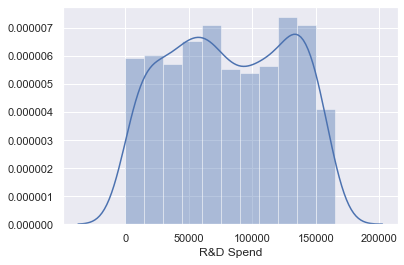

In [152]:
sns.distplot(df['R&D Spend']);

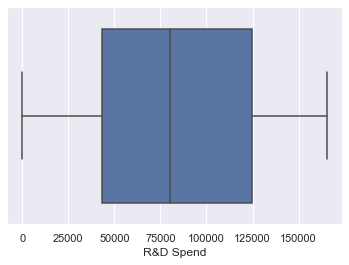

In [154]:
sns.boxplot(df['R&D Spend']);

In [155]:
upper_division = df['R&D Spend'].mean() + 2*df['R&D Spend'].std()
upper_division

174744.06298297833

In [156]:
lower_division = df['R&D Spend'].mean() - 2*df['R&D Spend'].std()
lower_division

-11406.208582978317

In [157]:
dfs_filtered = dfs[(dfs['R&D Spend']> upper_division) | (dfs['R&D Spend']<lower_division)]
dfs_filtered

,R&D Spend,Administration,Marketing Spend,Profit


* No Outliers

# 2.Distribution of profit and marketing spend

In [158]:
df_ms = df.loc[:,['Marketing Spend','Profit']]
df_ms.head(10)

,Marketing Spend,Profit
0,471784.10,192261.83
1,443898.53,191792.06
2,407934.54,191050.39
3,383199.62,182901.99
4,366168.42,166187.94
5,362861.36,156991.12
6,127716.82,156122.51
7,323876.68,155752.60
8,311613.29,152211.77
9,304981.62,149759.96


## Ploting a histogram Distribution and bell curve

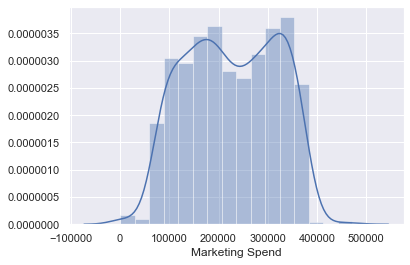

In [160]:
# Simpler ploting method
sns.distplot(df['Marketing Spend']);

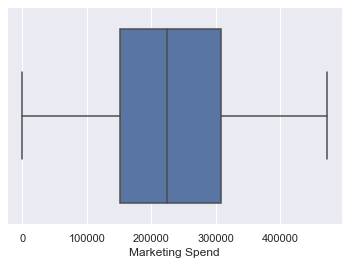

In [161]:
sns.boxplot(df['Marketing Spend'])

## Removing Outliers

In [162]:
df_ms['Marketing Spend'].max()

471784.1

In [163]:
# Finding the upper Divition
upper_dev = df_ms['Marketing Spend'].mean() + 3*df_ms['Marketing Spend'].std()
print(f'Upper deviation {upper_dev}' )

lower_dev = df_ms['Marketing Spend'].mean() - 3*df_ms['Marketing Spend'].std()
print(f'Upper deviation {lower_dev}' )

Upper deviation 500940.23904514324
Upper deviation -48530.12220748261


In [164]:
#Displaying the df with the outliers
# df[df_ms['Marketing Spend']>upper_dev | df_ms['Marketing Spend']< lower_dev ]

df_filtered = df_ms[(df_ms['Marketing Spend'] > upper_dev) | (df_ms['Marketing Spend'] < lower_dev)]
df_filtered

,Marketing Spend,Profit


* No Outliers

# 3. Distribution of profit with Administration


In [197]:
df_ad = df.loc[:,['Administration']]
df_ad.head(10)

,Administration
0,136897.80
1,151377.59
2,101145.55
3,118671.85
4,91391.77
5,99814.71
6,147198.87
7,145530.06
8,148718.95
9,108679.17


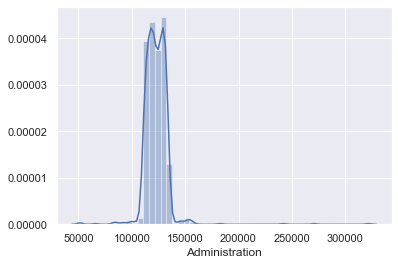

In [166]:
# Ploting a histogram for r and d spend against profit
sns.distplot(df['Administration'])

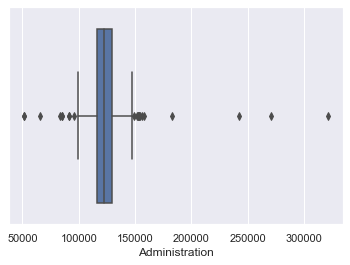

In [167]:
sns.boxplot(df['Administration'])

In [174]:
df_ad.describe().T

,count,mean,std,min,25%,50%,75%,max
Administration,1000.0,122963.897612,12613.927535,51283.14,116640.684850,122421.61215,129139.118000,321652.14
Profit,1000.0,119546.164656,42888.633848,14681.40,85943.198543,117641.46630,155577.107425,476485.43


In [171]:
df_ad.mean()

Administration    122963.897612
Profit            119546.164656
dtype: float64

In [172]:
2*df_ad['Administration'].std()

25227.85506926199

In [201]:
# Finding the upper Divition
upper_devs = df_ad['Administration'].quantile(0.25) - 1.5*iqr
print(f'Upper deviation {upper_devs}' )

lower_devs = df_ad['Administration'].quantile(0.75) + 1.5*iqr
print(f'lower deviation {lower_devs}' )

Upper deviation 97893.035125
lower deviation 147886.76772500004


In [202]:
df_ad.loc[(df_ad['Administration'] > upper_dev) | (df_ad['Administration'] < lower_dev)]

,Administration


In [203]:
#Displaying the df with the outliers
# df[df_ms['Marketing Spend']>upper_dev | df_ms['Marketing Spend']< lower_dev ]

df_filtereds = df_ad[(df_ad['Administration'] > upper_dev) | (df_ad['Administration'] < lower_dev)]
df_filtereds

,Administration


* No Outliers 

In [182]:
lower = df_ad['Administration'].quantile(0.25)
upper = df_ad['Administration'].quantile(0.75)

In [184]:
print('lower:',lower)
print('upper:',upper)


lower: 116640.68485
upper: 129139.11800000002


In [195]:
iqr = upper - lower
iqr*1.5

18747.649725000017

In [196]:
lower-(iqr*1.5)

97893.035125

In [ ]:
upper-

In [187]:
df_ad['Administration'].std()

12613.927534630995

In [ ]:
def remove_outliers_iqr(df):
    numeric_df = df.select_dtypes(include=[np.number])
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers for numeric columns
    filtered_df = numeric_df[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]
    # Returning the filtered DataFrame with non-numeric columns
    return df.loc[filtered_df.index]

## Correlation Analysis

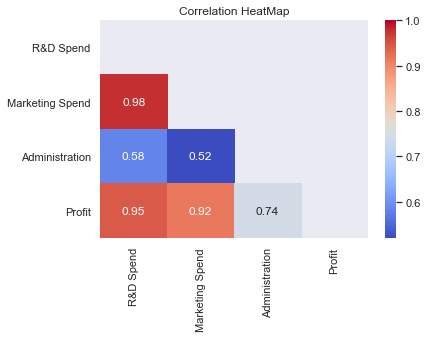

In [63]:
numeric_features = ['R&D Spend', 'Marketing Spend', 'Administration','Profit']

# compute correlatin matrix
corr_matrix = df[numeric_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix,dtype = bool))

# Plot correlation heatmap with triane shape

sns.heatmap(corr_matrix,mask=mask, annot= True , cmap = 'coolwarm')
plt.title('Correlation HeatMap')
plt.show()

## state-Profit  Correlation

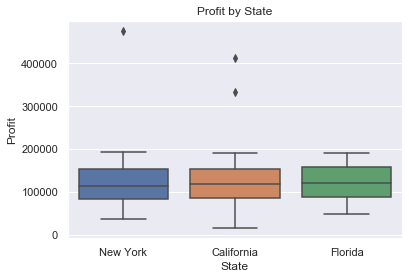

In [57]:
# Set plot
sns.set(style='darkgrid')
sns.boxplot(x='State',y='Profit',data = data)
plt.title('Profit by State')
plt.show()

## RD SPEND TO PROIT

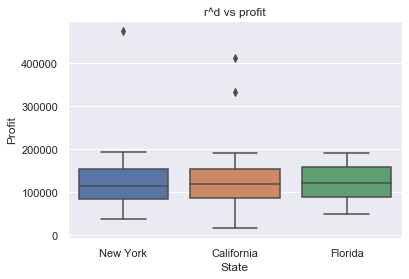

In [59]:
# Set plot
sns.set(style='darkgrid')
sns.boxplot(x='State',y = 'Profit', data = data)
plt.title('r^d vs profit')
plt.show()

## Defining the X and y


In [11]:
target = 'Profit'
X = df.drop(target,axis=1)
y = df[target]

# Splitting the model

In [12]:
# splitting the data set into x test, x train, y test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# 1st Model

In [13]:






# Creating the model
model  = LinearRegression()
model.fit(X_train,y_train)


# Print R2 and MSE for training and test sets
# # 3. Predict the target variable for both the training and test data
print(f" Score for Linear regresion training data {model.score(X_train,y_train)}" )
print(f" Score for Linear regresion testing data {model.score(X_test,y_test)}" )

# # Compute  MSE for the test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


train_mse = mean_squared_error(y_train,y_train_pred)
test_mse = mean_squared_error(y_test,y_test_pred)

# Printing MSE for the train data
print("Training Data MSE:", train_mse)

# Printing MSE for the test data
print("Test Data MSE:", test_mse)

 Score for Linear regresion training data 0.9412268025828195
 Score for Linear regresion testing data 0.9825277846008162
Training Data MSE: 109107426.78277354
Test Data MSE: 30775142.85678117


In [15]:
# Calculate metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)


# Print the metrics
print("Mean Absolute Error (MAE) - Train:", mae_train)
print("Mean Absolute Error (MAE) - Test:", mae_test)
print("Mean Squared Error (MSE) - Train:", mse_train)
print("Mean Squared Error (MSE) - Test:", mse_test)


Mean Absolute Error (MAE) - Train: 2286.0665334467553
Mean Absolute Error (MAE) - Test: 1404.4378483075998
Mean Squared Error (MSE) - Train: 109107426.78277354
Mean Squared Error (MSE) - Test: 30775142.85678117
